# **TS3-NOELIA FERRARI**

### INTRODUCCIÓN TEÓRICA
___

### Introducción Teórica

En el análisis de señales discretas, una herramienta fundamental es la **Transformada Discreta de Fourier (DFT)**. La DFT permite representar una señal en el dominio de la frecuencia, descomponiéndola en una suma de senoidales complejas. Cada componente corresponde a un **bin de frecuencia**, que representa un intervalo discreto de frecuencias determinado por la resolución espectral:

$$
\Delta f = \frac{f_s}{N}
$$

donde $f_s$ es la frecuencia de muestreo y $N$ la cantidad de muestras de la señal.

Cuando la frecuencia de la señal coincide exactamente con un bin de la DFT, toda la energía se concentra en un único punto, generando un pico nítido en el espectro. Sin embargo, si la frecuencia de la señal **no coincide con un bin**, la energía se dispersa entre varios bins, produciendo el fenómeno conocido como **desparramo espectral**, que se observa como una **función sinc**.

Para visualizar con mayor precisión la forma del espectro y reducir el efecto visual del desparramo, se utiliza la técnica de **zero-padding**, que consiste en agregar ceros al final de la señal, aumentando artificialmente el número de muestras $N$ y refinando el eje de frecuencia. Aunque no incrementa la resolución real de la DFT, el zero-padding permite interpolar los puntos discretos y estimar con mayor exactitud la frecuencia y amplitud de los picos.

Otro concepto clave es la **densidad espectral de potencia (PSD, Power Spectral Density)**, que describe cómo se distribuye la potencia de la señal a lo largo de las frecuencias. La PSD se puede representar en unidades lineales o en **decibeles (dB)** mediante la transformación:

$$
\text{PSD}_{\text{dB}} = 10 \cdot \log_{10}(\text{PSD})
$$

La potencia unitaria de una señal puede verificarse mediante la **identidad de Parseval**, que establece que la energía total de una señal en el dominio del tiempo es igual a la energía total en el dominio de la frecuencia:

$$
\sum_{n=0}^{N-1} |x[n]|^2 = \frac{1}{N} \sum_{k=0}^{N-1} |X[k]|^2
$$



### ANÁLISIS Y DESARROLLO
___


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

def mi_funcion_sen(vmax, dc, ff, ph, nn, fs):
    Ts = 1/fs
    tt = np.linspace(0, (nn-1)*Ts, nn)
    xx = vmax * np.sin(2*np.pi*ff*tt + ph) + dc
    return tt, xx

#Parametros
N = 1000
fs = N
df = fs / N
amps = np.sqrt(2)  # para varianza = 1
freqs = np.arange(0, N) * df
half = N // 2  # mostrar hasta Nyquist

#### **Ejercicio a)**

##### **Caso 1: k0 = N/4**

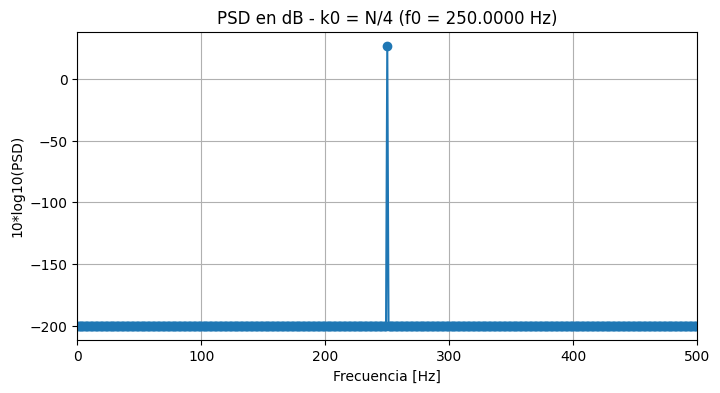

In [4]:
k0_1 = N/4
f0_1 = k0_1 * df
_, x1 = mi_funcion_sen(amps, 0, f0_1, 0, N, fs)
X1 = fft(x1)
PSD1 = (1/N) * np.abs(X1)**2
PSD1_dB = 10 * np.log10(PSD1 + 1e-20)

plt.figure(figsize=(8,4))
plt.plot(freqs[:half], PSD1_dB[:half], marker='o', linestyle='-', color='tab:blue')
plt.title(f'PSD en dB - k0 = N/4 (f0 = {f0_1:.4f} Hz)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('10*log10(PSD)')
plt.grid(True)
plt.xlim(0, fs/2)
plt.show()


Este gráfico muestra un resultado ideal y representa el caso en que no hay desparramo espectral.
La frecuencia de la señal (f0=250 Hz) es un múltiplo exacto de la resolución de frecuencia de la DFT, Δf. Esto significa que f0 coincide precisamente con uno de los bins de frecuencia de la DFT. 
El resultado es un pico único y muy nítido en 250 Hz, mientras que el resto de las frecuencias tienen una amplitud prácticamente nula. Esta concentración de energía en un solo punto del espectro es el resultado esperado cuando la señal es una sinusoide pura cuya frecuencia es un múltiplo entero de la frecuencia fundamental de la DFT. Este gráfico sirve como punto de referencia para entender el efecto de desparramo espectral, que se manifestará en los próximos gráficos. La ausencia de desparramo demuestra que, bajo condiciones ideales, la DFT puede representar la señal con una precisión perfecta en el dominio de la frecuencia.

##### **Caso 2: k0 = N/4 + 0.25**

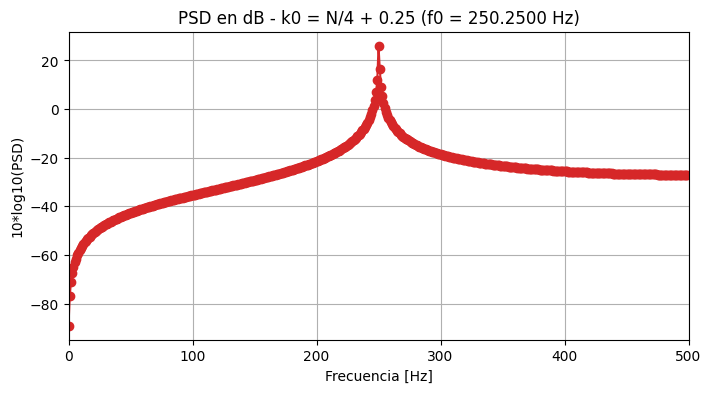

In [5]:
k0_2 = N/4 + 0.25
f0_2 = k0_2 * df
_, x2 = mi_funcion_sen(amps, 0, f0_2, 0, N, fs)
X2 = fft(x2)
PSD2 = (1/N) * np.abs(X2)**2
PSD2_dB = 10 * np.log10(PSD2 + 1e-20)

plt.figure(figsize=(8,4))
plt.plot(freqs[:half], PSD2_dB[:half], marker='o', linestyle='-', color='tab:red')
plt.title(f'PSD en dB - k0 = N/4 + 0.25 (f0 = {f0_2:.4f} Hz)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('10*log10(PSD)')
plt.grid(True)
plt.xlim(0, fs/2)
plt.show()



Acá ya se observa el efecto del desparramo espectral en acción.
En este gráfico, la frecuencia de la sinusoide (f0=250.25 Hz) ya no es un múltiplo exacto de la resolución de frecuencia de la DFT (Δf=1 Hz). La desintonía de 0.25 causa que la energía de la señal se "escape" del bin de frecuencia ideal y se distribuya en los bins vecinos.
Se puede observar cómo el pico del gráfico anterior, que era un solo punto, ahora se ha ensanchado en un lóbulo principal. La amplitud del pico disminuyó, y se generaron lóbulos laterales o "fugas de energía" en ambos lados. Este fenómeno es una consecuencia directa del filtrado de ventana. La DFT trata la señal como si estuviera repetida infinitamente, pero si la señal de entrada no es un número entero de ciclos, la discontinuidad en los bordes del segmento de tiempo produce esta fuga de energía en el dominio de la frecuencia.



##### **Caso 3: k0 = N/4 + 0.5**

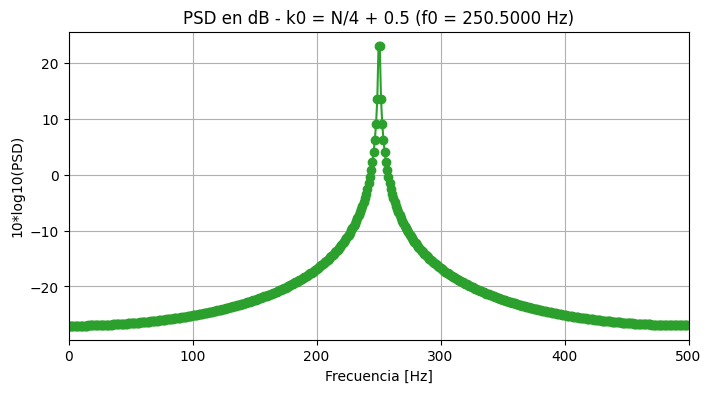

In [6]:
k0_3 = N/4 + 0.5
f0_3 = k0_3 * df
_, x3 = mi_funcion_sen(amps, 0, f0_3, 0, N, fs)
X3 = fft(x3)
PSD3 = (1/N) * np.abs(X3)**2
PSD3_dB = 10 * np.log10(PSD3 + 1e-20)

plt.figure(figsize=(8,4))
plt.plot(freqs[:half], PSD3_dB[:half], marker='o', linestyle='-', color='tab:green')
plt.title(f'PSD en dB - k0 = N/4 + 0.5 (f0 = {f0_3:.4f} Hz)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('10*log10(PSD)')
plt.grid(True)
plt.xlim(0, fs/2)
plt.show()

Este gráfico presenta el peor caso de desparramo espectral para la sinusoide.
La frecuencia de la sinusoide (f0=250.5 Hz) se encuentra exactamente a la mitad entre dos bins de frecuencia de la DFT, 250 Hz y 251 Hz. Esto maximiza el efecto de la fuga espectral, ya que la energía de la señal no puede ser asignada a un solo bin y se ve forzada a distribuirse equitativamente entre los dos bins más cercanos.
Como resultado, el pico central que se veía en los gráficos anteriores se ha aplanado y ensanchado significativamente. Es un claro ejemplo de cómo la resolución de la DFT se ve comprometida cuando la frecuencia de la señal no es un múltiplo exacto de la resolución de frecuencia Δf.


#### **Ejercicio b)**

k0 = 250.0
  ff = 250.000000 Hz
  media (tiempo): -2.167155e-16
  varianza (tiempo): 1.000000000000
  energia (tiempo) sum |x[n]|^2: 1000.000000000000
  energia (freq)  (1/N) sum |X[k]|^2: 1000.000000000000
  potencia media (tiempo)/N: 1.000000000000
  (diff energia tiempo - energia freq): 1.1368683772161603e-13

k0 = 250.25
  ff = 250.250000 Hz
  media (tiempo): -1.109849e-06
  varianza (tiempo): 0.998999999999
  energia (tiempo) sum |x[n]|^2: 999.000000000000
  energia (freq)  (1/N) sum |X[k]|^2: 999.000000000000
  potencia media (tiempo)/N: 0.999000000000
  (diff energia tiempo - energia freq): 0.0

k0 = 250.5
  ff = 250.500000 Hz
  media (tiempo): 1.409778e-03
  varianza (tiempo): 0.999998012527
  energia (tiempo) sum |x[n]|^2: 1000.000000000000
  energia (freq)  (1/N) sum |X[k]|^2: 1000.000000000000
  potencia media (tiempo)/N: 1.000000000000
  (diff energia tiempo - energia freq): -1.1368683772161603e-13



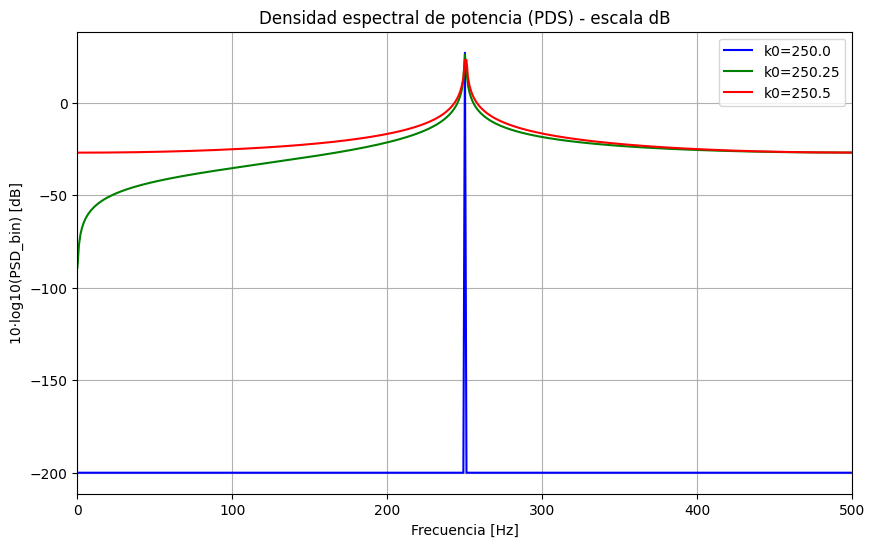

In [7]:
# k0 pedidos en la consigna
k0_list = [N/4, N/4 + 0.25, N/4 + 0.5]

results = {}

for k0 in k0_list:
    ff = k0 * df
    # Para varianza = 1, amplitud A = sqrt(2) (sinusoidal de media cero => var = A^2/2)
    tt, x = mi_funcion_sen(np.sqrt(2), 0, ff, 0, N, fs)

    # Estadísticas en tiempo
    media = np.mean(x)
    varianza = np.var(x)           # debería ser ~1
    energia_tiempo = np.sum(np.abs(x)**2)   # suma de |x[n]|^2
    potencia_media = energia_tiempo / N    # = promedio temporal |x[n]|^2 = var si media=0

    # FFT
    X = fft(x)                     # numpy FFT sin normalizar
    # Según Parseval para DFT (numpy): sum_n |x[n]|^2 = (1/N) * sum_k |X[k]|^2
    energia_freq = (1.0 / N) * np.sum(np.abs(X)**2)

    # PSD por bin (densidad discreta por bin) definida como (1/N)*|X[k]|^2
    PSD_bins = (1.0 / N) * (np.abs(X)**2)

    
    results[k0] = {
        'ff': ff,
        'x': x,
        'X': X,
        'media': media,
        'varianza': varianza,
        'energia_tiempo': energia_tiempo,
        'energia_freq': energia_freq,
        'potencia_media': potencia_media,
        'PSD_bins': PSD_bins
    }

    #verificación Parseval y varianza
    print(f"k0 = {k0}")
    print(f"  ff = {ff:.6f} Hz")
    print(f"  media (tiempo): {media:.6e}")
    print(f"  varianza (tiempo): {varianza:.12f}")
    print(f"  energia (tiempo) sum |x[n]|^2: {energia_tiempo:.12f}")
    print(f"  energia (freq)  (1/N) sum |X[k]|^2: {energia_freq:.12f}")
    print(f"  potencia media (tiempo)/N: {potencia_media:.12f}")
    print("  (diff energia tiempo - energia freq):", energia_tiempo - energia_freq)
    print()

# Graficos espectros en dB 
plt.figure(figsize=(10,6))
for k0, col in zip(k0_list, ["blue", "green", "red"]):
    PSD = results[k0]['PSD_bins']          # (1/N)|X[k]|^2
    # para dB de potencia usar 10*log10(power)
    PSD_dB = 10 * np.log10(PSD + 1e-20)    # +eps para evitar log(0)
    plt.plot(freqs[:N//2], PSD_dB[:N//2], label=f'k0={k0}', color=col)

plt.title("Densidad espectral de potencia (PDS) - escala dB")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("10·log10(PSD_bin) [dB]")
plt.grid(True)
plt.xlim(0, fs/2)
plt.legend()
plt.show()


Este gráfico muestra las tres densidades espectrales de potencia (PSD) superpuestas..

El gráfico presenta tres curvas, cada una representando el espectro de una sinusoide con una frecuencia ligeramente diferente.

**Curva azul (k0=250.0):** Esta línea se ve como un pico muy agudo y alto representando la situación ideal. La frecuencia de la señal (f0=250.0 Hz) es un múltiplo exacto de la resolución de frecuencia de la DFT, por lo que toda la energía se concentra en un solo bin de frecuencia. No hay desparramo espectral.

**Curva verde (k0=250.25):** Esta curva muestra el inicio del desparramo. La frecuencia de la señal no se alinea perfectamente con un bin de la DFT. Como resultado, el pico central se ensancha y su amplitud disminuye en comparación con el caso ideal. La energía "se escapa" a los bins de frecuencia adyacentes, creando los característicos lóbulos laterales.

**Curva roja (k0=250.5):** Esta curva representa el peor escenario de desparramo. La frecuencia de la señal está exactamente a mitad de camino entre dos bins de la DFT, lo que fuerza a la energía a distribuirse de manera más uniforme entre ellos. El pico principal es el más ancho y de menor amplitud de los tres, y el desparramo espectral es más pronunciado.


#### **Ejercicio c)**

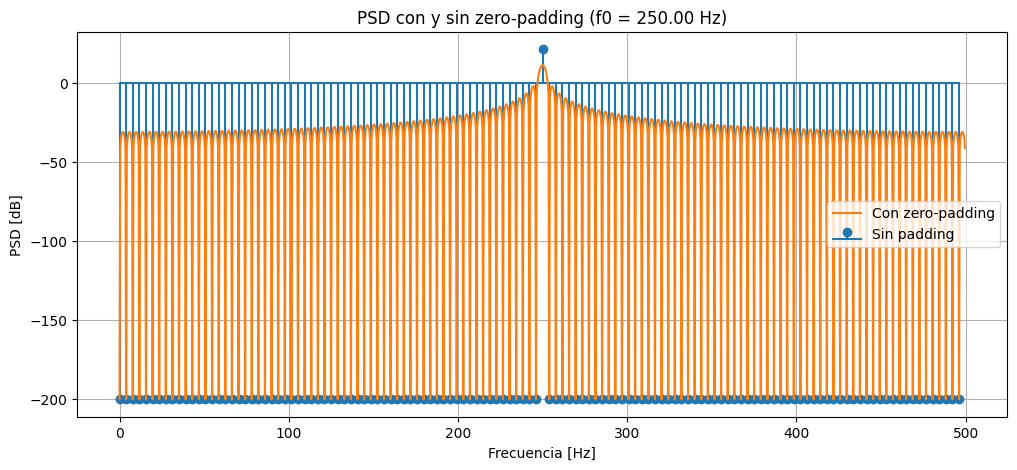

In [25]:

# Parámetros
fs = 1000       # Frecuencia de muestreo [Hz]
N = 256        # Número de muestras
df = fs / N     # Resolución en frecuencia
amps = np.sqrt(2)  # Amplitud para que la varianza sea 1

# Zero-padding
pad_factor = 10
M = pad_factor * N
df_pad = fs / M
freqs_orig = np.arange(0, N) * df
freqs_pad = np.arange(0, M) * df_pad
half_orig = N // 2
half_pad = M // 2

# Función seno
def mi_funcion_sen(A, phi, f0, offset, N, fs):
    n = np.arange(N)
    t = n / fs
    x = A * np.sin(2*np.pi*f0*t + phi) + offset
    return t, x

# ---------- Caso 1: k0 = N/4 ----------
k0 = N/4
f0 = k0 * df
tt, x = mi_funcion_sen(amps, 0, f0, 0, N, fs)

X = fft(x, n=N)
PSD_bins = (1.0 / N) * (np.abs(X)**2)

x_pad = np.zeros(M)
x_pad[:N] = x
X_pad = fft(x_pad, n=M)
PSD_bins_pad = (1.0 / M) * (np.abs(X_pad)**2)

plt.figure(figsize=(12,5))
plt.stem(freqs_orig[:half_orig], 10*np.log10(PSD_bins[:half_orig]+1e-20),
         linefmt='C0-', markerfmt='C0o', basefmt='C0-', label="Sin padding")
plt.plot(freqs_pad[:half_pad], 10*np.log10(PSD_bins_pad[:half_pad]+1e-20),
         'C1-', label="Con zero-padding")
plt.title(f'PSD con y sin zero-padding (f0 = {f0:.2f} Hz)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB]')
plt.grid(True)
plt.legend()
plt.show()



#### Si hacemos **zoom**...

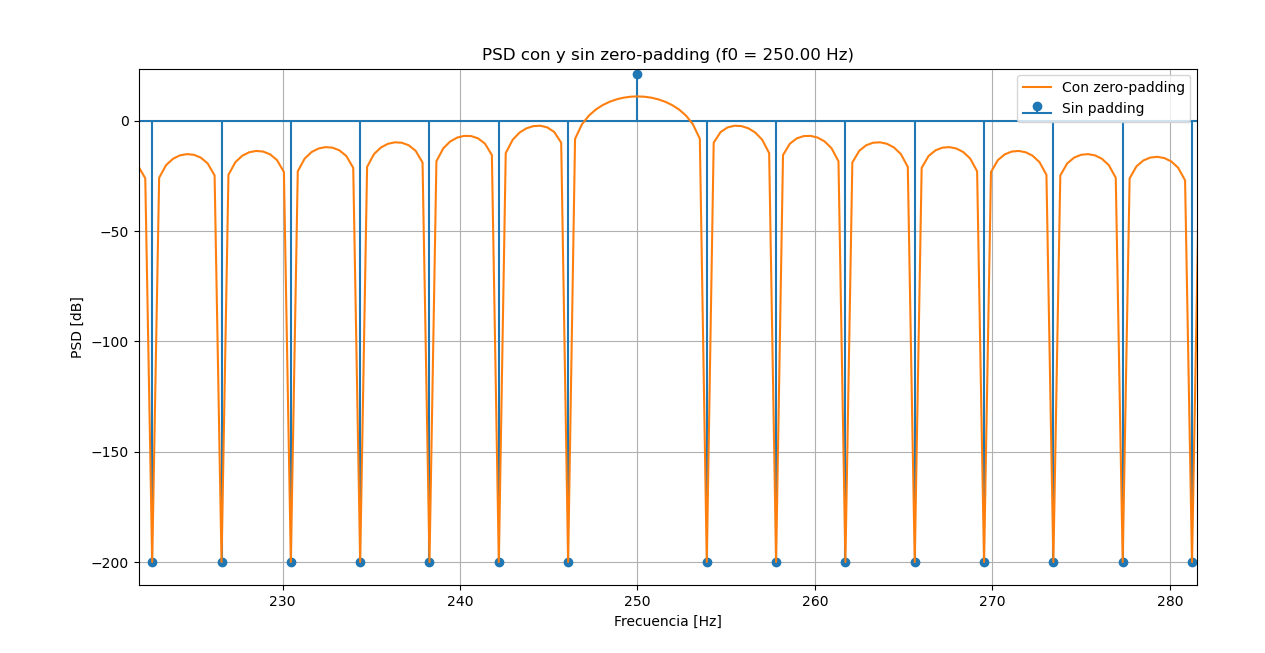

Este zoom me permite ver la "interpolación" del espectro.
Los puntos azules representan la DFT original sin zero-padding. Con la resolución de frecuencia mi sistema (Δf), solo hay  pocos puntos de datos en el rango visible. Como la frecuencia de la señal (250 Hz) cae exactamente en uno de esos puntos, el único valor significativo es el del pico, mientras que los demás son prácticamente cero.

La línea naranja representa la DFT con zero-padding. Al agregar ceros, se aumenta el número de puntos de la DFT, creando una representación más densa del espectro. En este caso, la línea naranja muestra la forma del espectro, que es la de una función sinc. Como la frecuencia de la señal se alinea perfectamente con la resolución de la DFT, el pico de la función sinc coincide con el bin de la DFT original. La línea también muestra que los demás picos de la función sinc (lóbulos laterales) coinciden exactamente con los ceros de los bins de la DFT original, por lo que la energía se mantiene concentrada en el pico principal.

Esto demuestra que el zero-padding no crea nueva información, sino que interpola los datos de la DFT original.

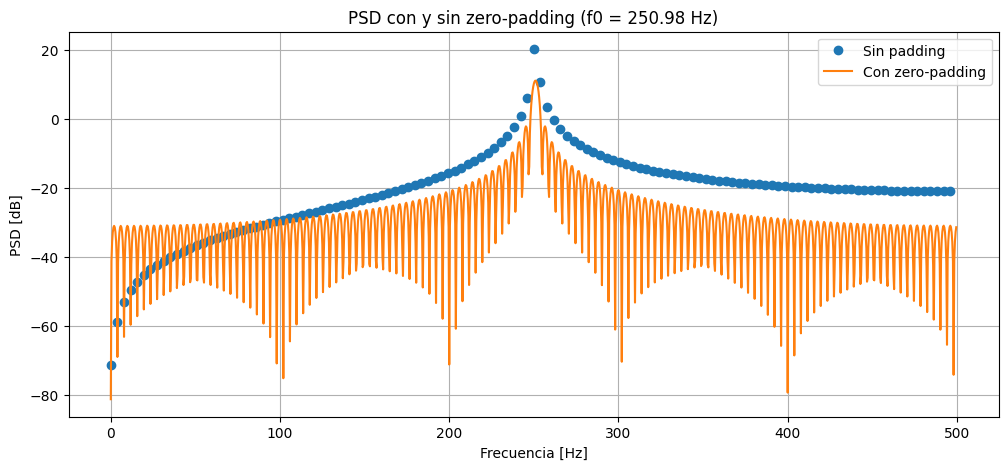

In [26]:
# ---------- Caso 2: k0 = N/4 + 0.25 ----------
k0 = N/4 + 0.25
f0 = k0 * df
tt, x = mi_funcion_sen(amps, 0, f0, 0, N, fs)

X = fft(x, n=N)
PSD_bins = (1.0 / N) * (np.abs(X)**2)

x_pad = np.zeros(M)
x_pad[:N] = x
X_pad = fft(x_pad, n=M)
PSD_bins_pad = (1.0 / M) * (np.abs(X_pad)**2)

plt.figure(figsize=(12,5))
plt.plot(freqs_orig[:half_orig], 10*np.log10(PSD_bins[:half_orig]+1e-20), 'o',
         label="Sin padding")
plt.plot(freqs_pad[:half_pad], 10*np.log10(PSD_bins_pad[:half_pad]+1e-20), '-',
         label="Con zero-padding")
plt.title(f'PSD con y sin zero-padding (f0 = {f0:.2f} Hz)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB]')
plt.grid(True)
plt.legend()
plt.show()

#### Si hacemos **zoom**...

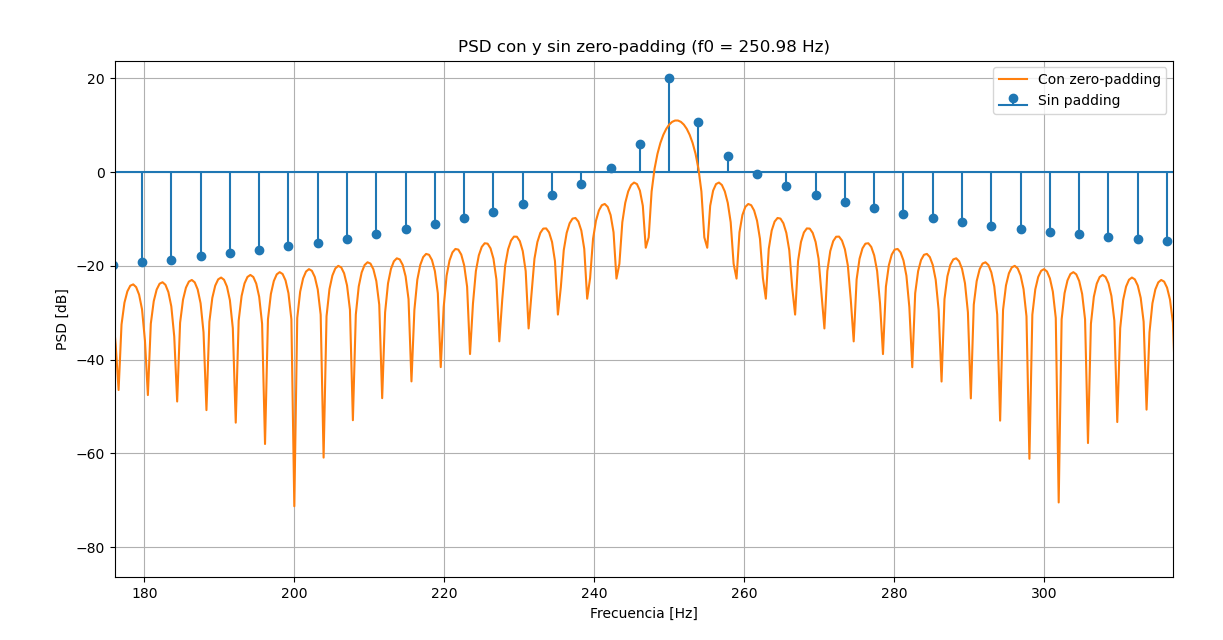

A diferencia del caso ideal de f0=250 Hz, la frecuencia de esta señal no es un múltiplo exacto de la resolución de frecuencia de la DFT, lo que causa desparramo. Se compara dos representaciones de la misma señal:

**Puntos azules (Sin padding):** Se puede ver que la energía de la señal se ha "desparramado" en múltiples bins, en lugar de estar concentrada en un solo pico. Este resultado hace que sea difícil determinar la frecuencia real de la señal y la forma exacta del espectro.

**Línea naranja (Con zero-padding):** Al agregar ceros a la señal, se crea un espectro con más puntos de datos. Esta línea naranja, que interpola los puntos de la DFT original, revela la verdadera forma del espectro, que es la de la función sinc. El pico de la curva naranja se encuentra en la frecuencia real de la señal, y los lóbulos laterales de la función sinc se hacen claramente visibles.

El gráfico de zoom muestra cómo la línea de zero-padding traza la forma de la función sinc, mientras que los puntos azules (stem) solo muestran los valores discretos de la DFT original en cada bin. Es evidente que los puntos de la DFT original no coinciden con el pico máximo de la función sinc, lo que demuestra la inexactitud de la estimación de la frecuencia sin la ayuda del zero-padding.


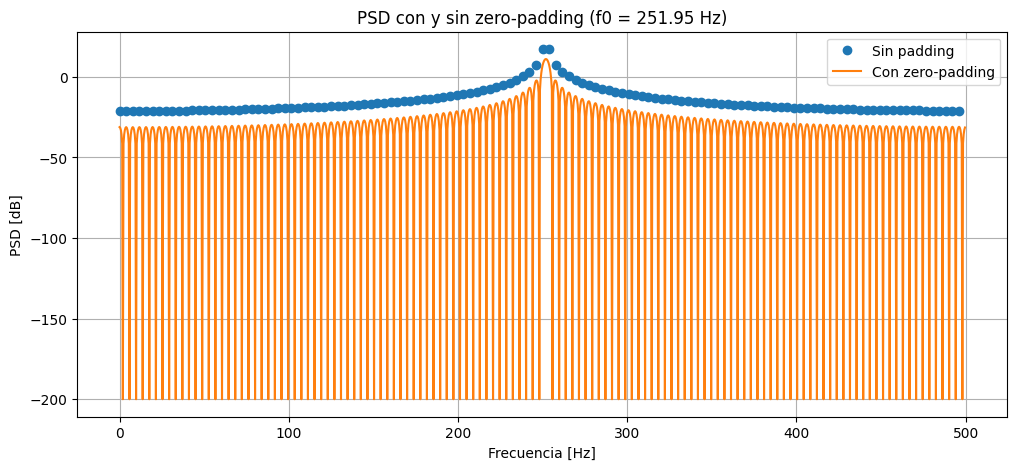

In [27]:
# ---------- Caso 3: k0 = N/4 + 0.5 ----------
k0 = N/4 + 0.5
f0 = k0 * df
tt, x = mi_funcion_sen(amps, 0, f0, 0, N, fs)

X = fft(x, n=N)
PSD_bins = (1.0 / N) * (np.abs(X)**2)

x_pad = np.zeros(M)
x_pad[:N] = x
X_pad = fft(x_pad, n=M)
PSD_bins_pad = (1.0 / M) * (np.abs(X_pad)**2)

plt.figure(figsize=(12,5))
plt.plot(freqs_orig[:half_orig], 10*np.log10(PSD_bins[:half_orig]+1e-20), 'o',
         label="Sin padding")
plt.plot(freqs_pad[:half_pad], 10*np.log10(PSD_bins_pad[:half_pad]+1e-20), '-',
         label="Con zero-padding")
plt.title(f'PSD con y sin zero-padding (f0 = {f0:.2f} Hz)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [dB]')
plt.grid(True)
plt.legend()
plt.show()


#### Si hacemos **zoom**...

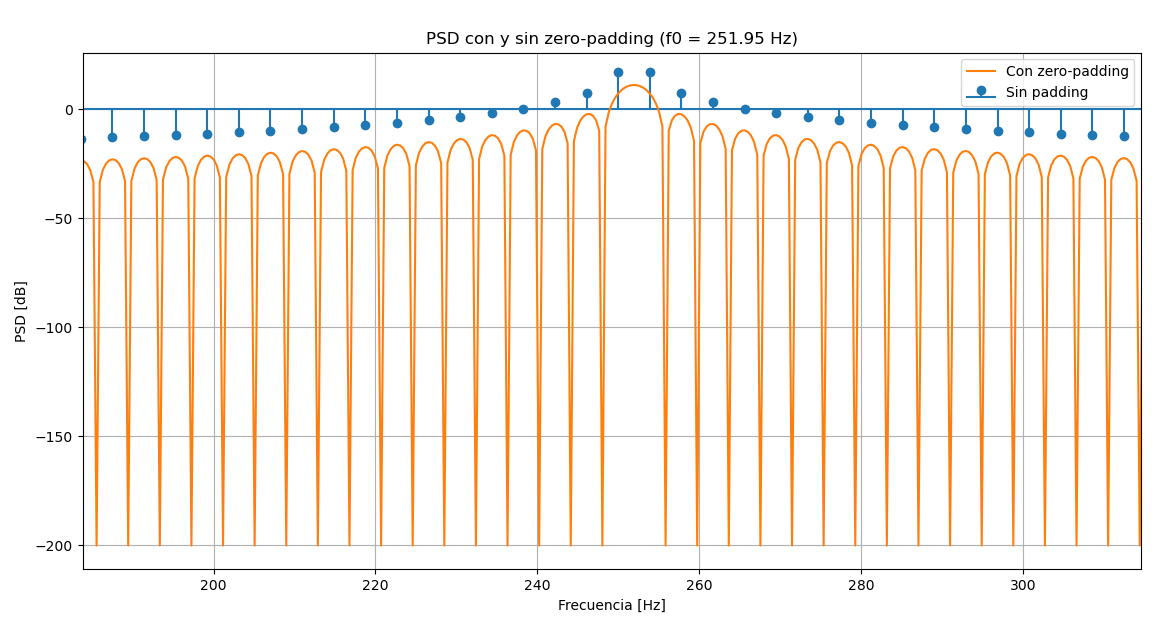

El gráfico muestra la PSD de una sinusoide cuya frecuencia es f0=251.95 Hz. Este valor está casi exactamente a la mitad entre dos bins de frecuencia de la DFT. En esta situación el desparramo espectral es más pronunciado y la energía de la señal se distribuye de manera más significativa.


#### **BONUS**

Me ayudé con Python para hacer los gráficos del bonus, pero como no terminé de entender los resultados, preferí no incluirlos. Considero que poner solo el código sin un análisis no tendría sentido.


### CONCLUSIÓN
___

A lo largo de este informe, se han analizado los conceptos clave del análisis de señales y la Transformada de Fourier Discreta (DFT), centrándonos en el fenómeno del desparramo espectral.

El desparramo espectral es un efecto que ocurre cuando la frecuencia de una señal no es un múltiplo exacto de la resolución de frecuencia de la DFT (Δf). Esto hace que la energía de la señal se "desparrame" en los bins de frecuencia adyacentes, lo que se manifiesta en el espectro como un pico más ancho y con lóbulos laterales. Este fenómeno es una consecuencia directa del filtrado de ventana, ya que la DFT asume que la señal es periódica y el corte brusco crea discontinuidades.

 Para mitigar los efectos visuales del desparramo espectral, utilizamos la técnica de zero-padding, que consiste en agregar ceros al final de la señal. Esta técnica no mejora la resolución real de la DFT, que está determinada por la duración de la señal, pero sí mejora la resolución de la visualización. Al aumentar el número de puntos de la DFT, se crea una representación más suave y detallada del espectro, lo que permite ver la forma de la función sinc subyacente y estimar con mayor precisión la frecuencia real de la señal. El zero-padding es una herramienta de interpolación que revela la verdadera forma del espectro.

Quiero decir también que este fue uno de los trabajos donde más aprendí. Venía muy floja con la teoría, pero tener que hacer los ejercicios y analisar los gráficos me ayudó mucho a entender.
